In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lifelines -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.0 MB/s eta 0:00:00


In [6]:
TEST_PATH = "/content/drive/MyDrive/1:1_Shriya_Wagholikar/Datasets/experiment_2a/exp2A_selectKBest_test.csv"

In [7]:
# read the test data
import pandas as pd
test_data = pd.read_csv(TEST_PATH)
test_data.head()

,ASB13,BEX4,BRCA1,C6orf58,TMEM248,CALU,CDK2,DNAJB12,EN1,FAM114A1,...,TEF,TGIF1,TMEM194B,TNFRSF11B,TNFRSF12A,TTC26,TUBGCP2,WISP1,Disease Free (Months),DFS_STATUS_ENCODED
0,-0.1050,1.0051,-1.2564,2.1691,-0.6761,-0.2567,-1.2467,0.1240,-0.9673,-0.9148,...,0.6173,-0.6709,-1.0707,-0.5709,-0.3455,-0.1503,1.3146,-0.2024,119.48,1.0
1,-0.5950,0.5236,-0.4643,-0.2513,-0.2209,-1.0171,0.0826,1.2554,-0.9815,0.2250,...,-0.1429,0.9833,0.6752,0.0074,0.8362,0.0404,0.8986,-0.3668,95.86,0.0
2,0.2187,-0.6935,0.5225,-1.9452,-0.3263,0.1202,0.3435,0.3733,0.2466,0.3526,...,-1.4228,0.0080,-0.4799,1.5829,-0.3940,0.6889,0.3286,-0.5494,16.79,1.0
3,0.5543,0.5403,-0.2203,1.1511,-0.6104,0.3412,-0.2451,-0.1870,-0.7498,-0.0701,...,0.9072,-0.3368,-0.8850,-0.2086,-0.2341,-0.0366,0.3464,-0.2734,14.55,0.0
4,0.3029,-0.1179,-1.1101,0.6479,-0.7701,-0.1898,-0.4056,0.5613,-0.5275,-0.1509,...,0.7651,-0.6792,-0.3531,-0.7662,0.1757,-0.5349,0.7937,0.8867,31.18,0.0


In [9]:
import pickle
# Load the saved model
MODEL_PATH = "/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_2a/best_model_exp2a"
with open(MODEL_PATH, "rb") as pickle_file:
    cph_final = pickle.load(pickle_file)

In [10]:
from lifelines.utils import concordance_index
# Evaluate on the test set
test_predictions = cph_final.predict_partial_hazard(test_data)
test_c_index = concordance_index(test_data['Disease Free (Months)'], -test_predictions, test_data['DFS_STATUS_ENCODED'])
print(f"Test C-index: {test_c_index}")

Test C-index: 0.7530017152658662


**Visualization**

Risk Score Plot

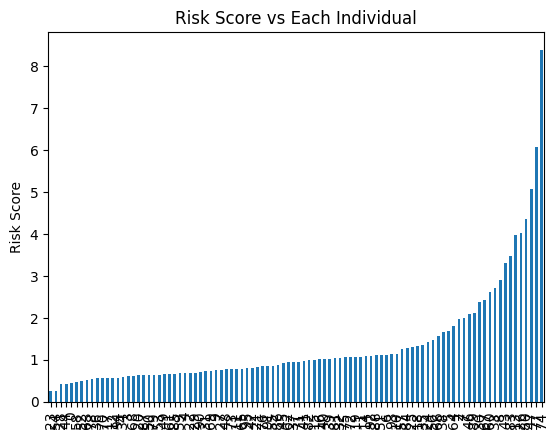

In [11]:
# sort the risk values
sorted_risk_score = test_predictions .sort_values()
# draw the plot
sorted_risk_score.plot.bar(ylabel = "Risk Score", title = "Risk Score vs Each Individual");

Hazard Ratio

In [12]:
hazard_ratios = cph_final.hazard_ratios_
hazard_ratios_sort = hazard_ratios.sort_values()

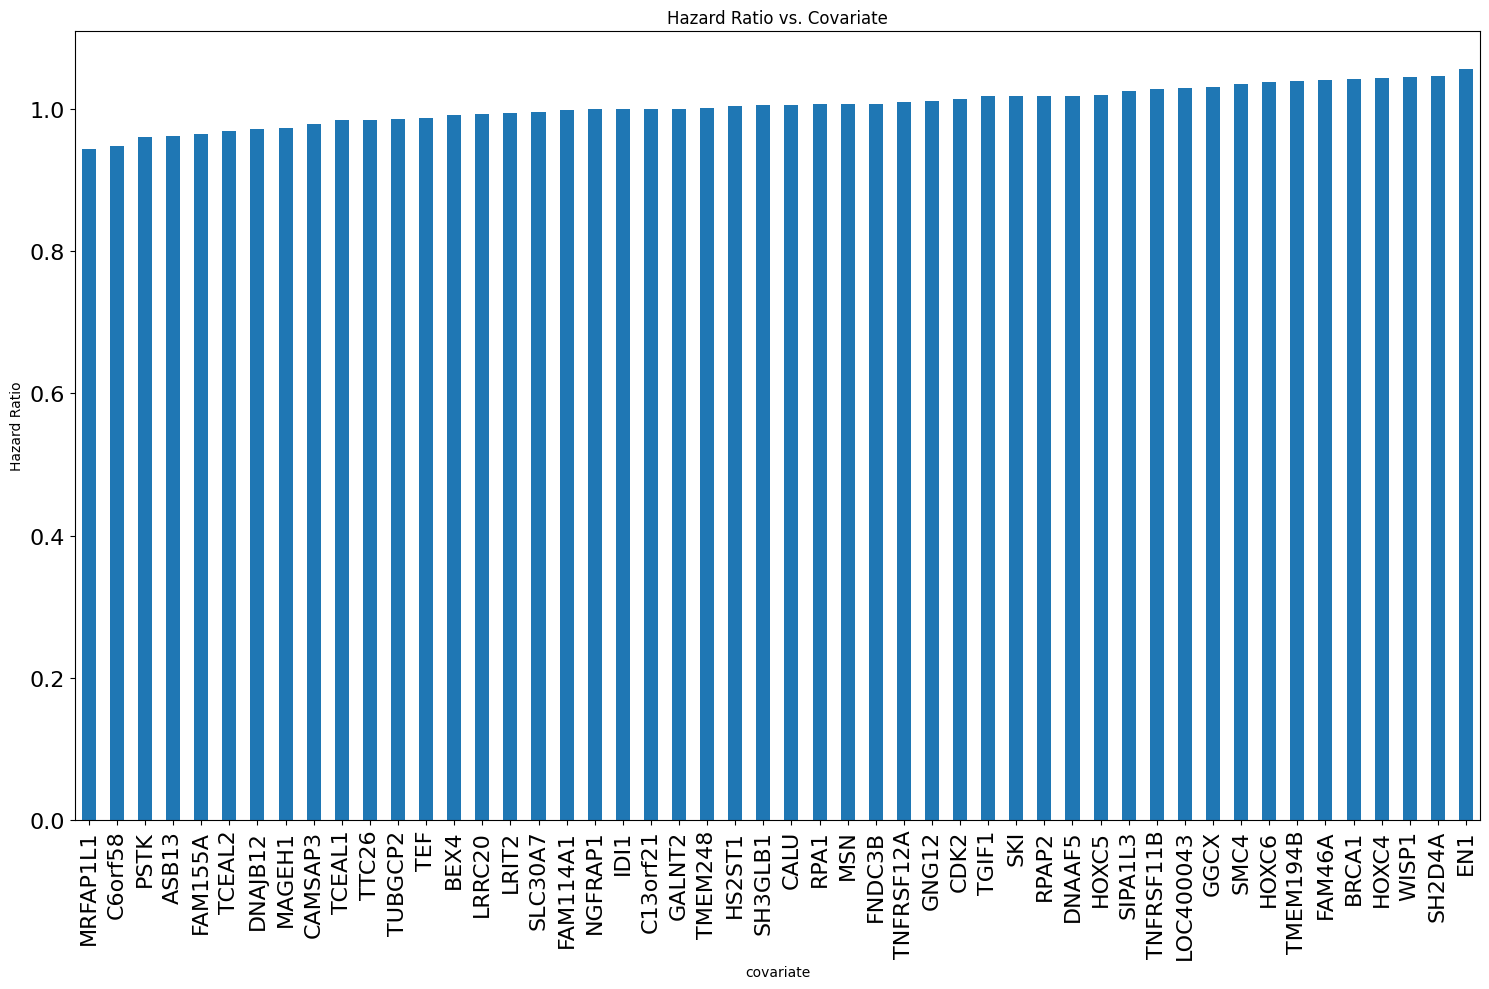

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))  # Adjust width and height as needed
# Create the bar plot
hazard_ratios_sort.plot.bar(ylabel="Hazard Ratio", title="Hazard Ratio vs. Covariate",fontsize=16)
#hazard_ratios_sort.plot.bar(ylabel="Hazard Ratio", title="Hazard Ratio vs. Covariate", log=True) # use this to see y small scale y labels
# Show the plot
plt.xticks(rotation=90,fontsize=16)
plt.tight_layout()
plt.show()

Time vs Survival Probability vs Reoccurence Time

In [14]:
# survival probabilities
survival_probabilities_original = cph_final.predict_survival_function(test_data, times = test_data["Disease Free (Months)"].to_list())
survival_probabilities = survival_probabilities_original.sort_index()
survival_probabilities.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0.03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2.69,0.995371,0.989041,0.979859,0.993712,0.993091,0.982903,0.988606,0.979754,0.970632,0.992402,...,0.991160,0.993498,0.988705,0.978438,0.992693,0.991312,0.988795,0.988468,0.994157,0.991812
2.96,0.994149,0.986160,0.974594,0.992053,0.991270,0.978425,0.985610,0.974462,0.963001,0.990400,...,0.988833,0.991784,0.985735,0.972807,0.990767,0.989025,0.985850,0.985436,0.992615,0.989655


In [15]:
#Creating a mapper to identify patients who are not censored and plot the graph only for those who have experienced recurrence
DISEASE_MAPPER = {}
# map the disease free or recurrent status
for patient_id_, status in enumerate(test_data["DFS_STATUS_ENCODED"]):
    DISEASE_MAPPER[str(patient_id_)] = status
print(DISEASE_MAPPER)

{'0': 1.0, '1': 0.0, '2': 1.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 1.0, '8': 1.0, '9': 1.0, '10': 1.0, '11': 0.0, '12': 0.0, '13': 1.0, '14': 0.0, '15': 1.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 1.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 1.0, '25': 1.0, '26': 1.0, '27': 1.0, '28': 0.0, '29': 0.0, '30': 1.0, '31': 0.0, '32': 1.0, '33': 1.0, '34': 0.0, '35': 1.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 1.0, '42': 0.0, '43': 0.0, '44': 0.0, '45': 0.0, '46': 1.0, '47': 1.0, '48': 1.0, '49': 0.0, '50': 0.0, '51': 1.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.0, '56': 0.0, '57': 0.0, '58': 0.0, '59': 0.0, '60': 1.0, '61': 0.0, '62': 0.0, '63': 0.0, '64': 0.0, '65': 0.0, '66': 0.0, '67': 0.0, '68': 0.0, '69': 1.0, '70': 1.0, '71': 0.0, '72': 0.0, '73': 1.0, '74': 0.0, '75': 0.0, '76': 0.0, '77': 0.0, '78': 0.0, '79': 0.0, '80': 0.0, '81': 0.0, '82': 0.0, '83': 1.0, '84': 0.0, '85': 1.0, '86': 1.0, '87': 1.0, '88': 0.0, '89': 1.0, '90': 0.0, '91': 0.

In [16]:
#Functions
import random
import numpy as np
import matplotlib.colors as mcolors
def generate_random_colors(n):
    # Get a list of all matplotlib color names
    color_names = list(mcolors.CSS4_COLORS.keys())
    # Check if the requested number of colors is greater than the available colors
    if n > len(color_names):
        raise ValueError(f"Requested number of colors exceeds available colors ({len(color_names)}).")
    # Select n random colors
    random_colors = random.sample(color_names, n)
    return random_colors

def generate_interpolation(id, index, intervals):
    time_occured = test_data["Disease Free (Months)"].to_list()
    intersection = np.interp(time_occured[index], intervals, survival_probabilities[id])
    return intersection

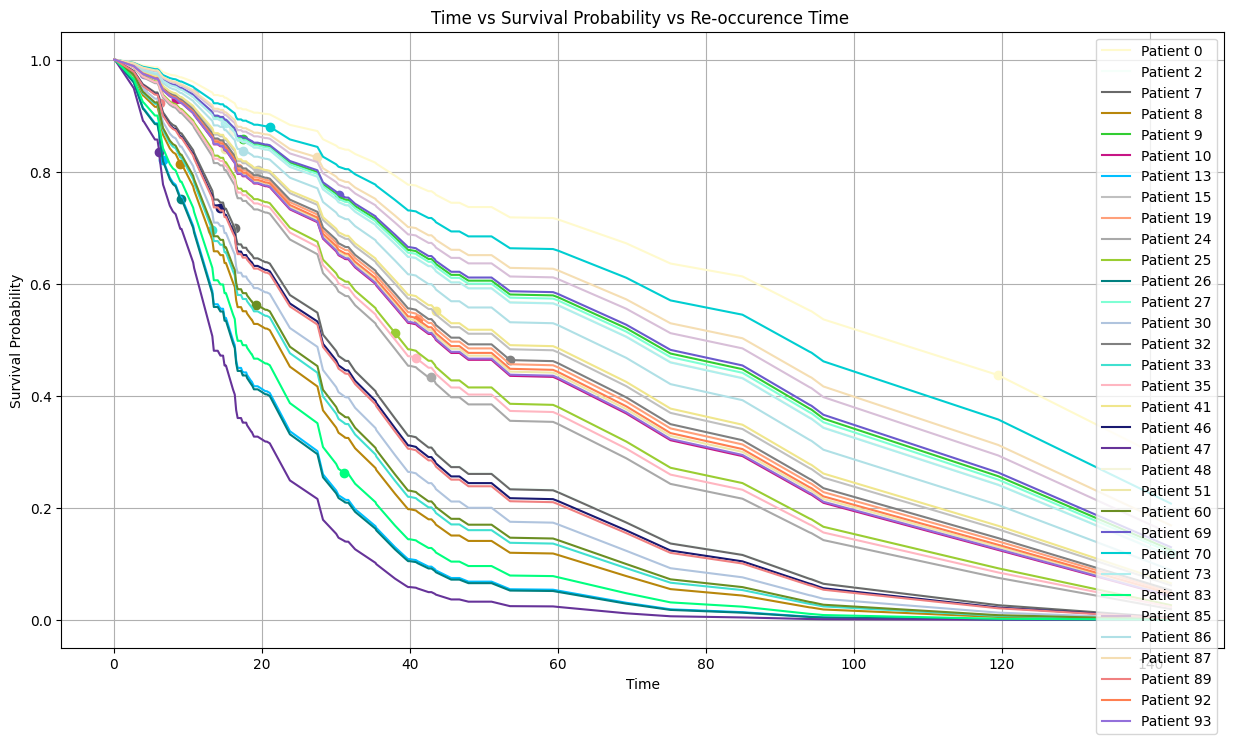

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# patients
patients_id = list(survival_probabilities.columns)
time_intervals = list(survival_probabilities.index)
color_palatte = generate_random_colors(len(patients_id))
time_occured = test_data["Disease Free (Months)"].to_list()
plt.figure(figsize = (15,8))
for index, id in enumerate(patients_id):
    if int(DISEASE_MAPPER[str(id)]) == 0: #identifying patients who are not censored and plot the graph only for those who have experienced recurrence.
        continue
    plt.plot(time_intervals, survival_probabilities[id].to_list(), label = f"Patient {id}", color = color_palatte[index])
    plt.scatter(x = time_occured[index], y = generate_interpolation(id, index, time_intervals), color = color_palatte[index])
plt.legend(loc = "best")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel('Survival Probability')
plt.title("Time vs Survival Probability vs Re-occurence Time ")
plt.show()

Survival Probabilities for Three Random Patients

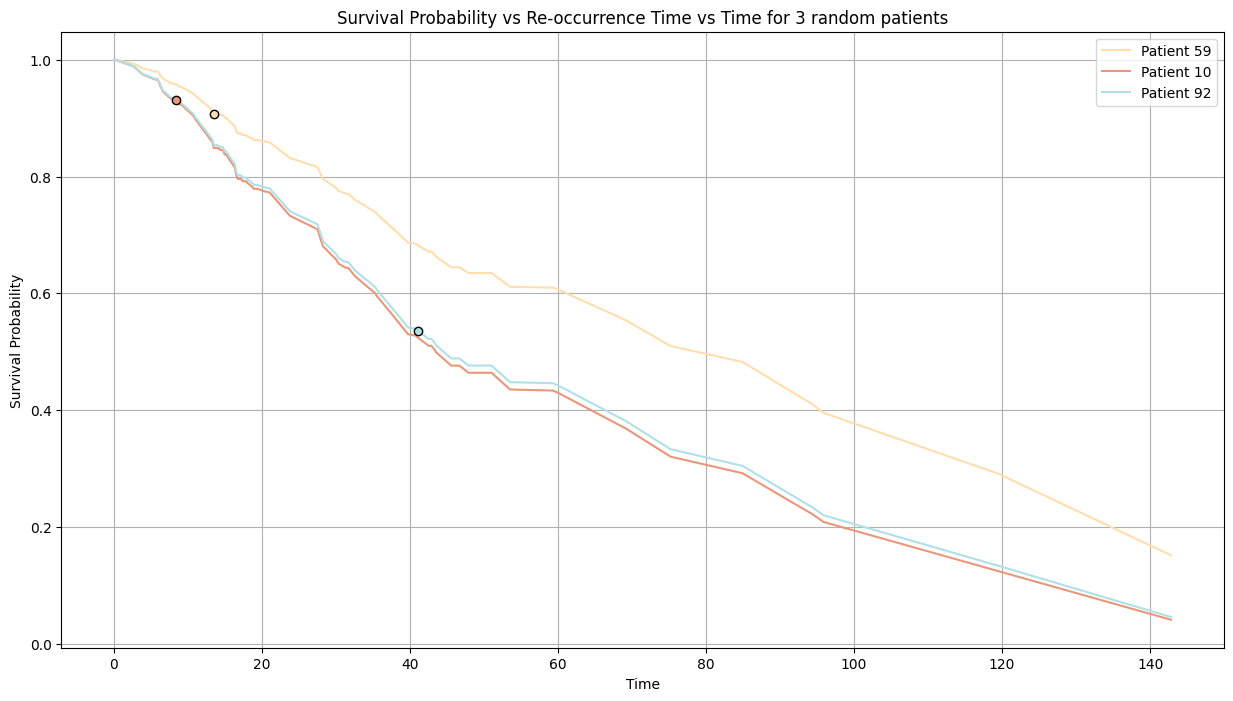

In [20]:
# Get patient IDs and time intervals
patients_id = list(survival_probabilities.columns)
time_intervals = list(survival_probabilities.index)
# Select 3 random patients
selected_patients = random.sample(patients_id, 3)
color_palette = generate_random_colors(len(selected_patients))
# Get the time occurred values from the test data
time_occured = test_data["Disease Free (Months)"].to_list()
# Create the plot
plt.figure(figsize=(15, 8))
for index, patient_id in enumerate(selected_patients):
    plt.plot(time_intervals, survival_probabilities[patient_id].to_list(),
             label=f"Patient {patient_id}", color=color_palette[index])
    # Plot dots on top of lines
    patient_index = patients_id.index(patient_id)
    plt.scatter(x=time_occured[patient_index],
                y=generate_interpolation(patient_id, patient_index, time_intervals),
                color=color_palette[index],edgecolor='black',zorder=5)

plt.legend(loc="best")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Survival Probability vs Re-occurrence Time vs Time for 3 random patients")
plt.show()

In [22]:
# Predict survival functions for the test data
survival_functions = cph_final.predict_survival_function(test_data)

In [36]:
THRESHOLD = 0.70

In [37]:
predictions = []
time_period = []
for index, survival_function in survival_functions.items():
    # Find the first time point where the survival probability drops below the threshold
    time_point = survival_function[survival_function < THRESHOLD].index[0] if any(survival_function < THRESHOLD) else None
    # Classify as recurrence (1) if such a time point exists, otherwise classify as no recurrence (0)
    prediction = "Re-occurence" if time_point is not None else "No-occurence"
    predictions.append(prediction)
    time_period.append(time_point)
# make copy of the original dataframe
pred_test_df = test_data.copy()
# attach the predictions
column_name = "Re-occurence_{}%".format(int(100 - (0.70 * 100)))
column_time_name = "Re-occurence-time"
pred_test_df[column_name] = predictions
pred_test_df[column_time_name] = time_period
pred_test_df.head()

,ASB13,BEX4,BRCA1,C6orf58,TMEM248,CALU,CDK2,DNAJB12,EN1,FAM114A1,...,TMEM194B,TNFRSF11B,TNFRSF12A,TTC26,TUBGCP2,WISP1,Disease Free (Months),DFS_STATUS_ENCODED,Re-occurence_30%,Re-occurence-time
0,-0.1050,1.0051,-1.2564,2.1691,-0.6761,-0.2567,-1.2467,0.1240,-0.9673,-0.9148,...,-1.0707,-0.5709,-0.3455,-0.1503,1.3146,-0.2024,119.48,1.0,Re-occurence,63.83
1,-0.5950,0.5236,-0.4643,-0.2513,-0.2209,-1.0171,0.0826,1.2554,-0.9815,0.2250,...,0.6752,0.0074,0.8362,0.0404,0.8986,-0.3668,95.86,0.0,Re-occurence,28.19
2,0.2187,-0.6935,0.5225,-1.9452,-0.3263,0.1202,0.3435,0.3733,0.2466,0.3526,...,-0.4799,1.5829,-0.3940,0.6889,0.3286,-0.5494,16.79,1.0,Re-occurence,16.36
3,0.5543,0.5403,-0.2203,1.1511,-0.6104,0.3412,-0.2451,-0.1870,-0.7498,-0.0701,...,-0.8850,-0.2086,-0.2341,-0.0366,0.3464,-0.2734,14.55,0.0,Re-occurence,41.95
4,0.3029,-0.1179,-1.1101,0.6479,-0.7701,-0.1898,-0.4056,0.5613,-0.5275,-0.1509,...,-0.3531,-0.7662,0.1757,-0.5349,0.7937,0.8867,31.18,0.0,Re-occurence,38.90


/tmp/ipython-input-189423620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(pred_test_df, x = column_name, palette="muted")


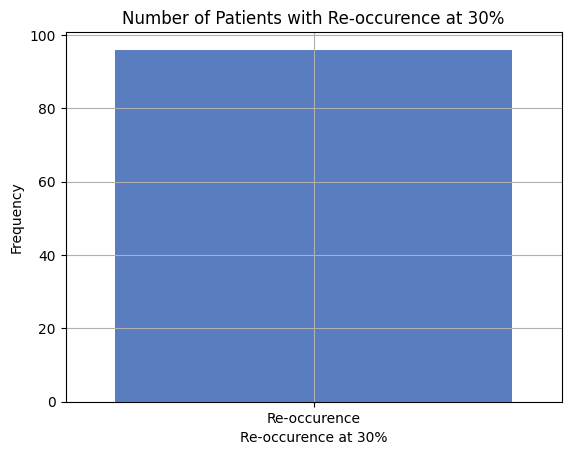

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(figsize = (5,5))
sns.countplot(pred_test_df, x = column_name, palette="muted")
plt.ylabel("Frequency")
plt.xlabel(f"Re-occurence at {int(100 - (0.70 * 100))}%")
plt.title(f"Number of Patients with Re-occurence at {int(100 - (0.70 * 100))}%")
plt.grid(True)
plt.show();

In [39]:
# get the error term
pred_test_df["error_time"] = abs(pred_test_df["Disease Free (Months)"] - pred_test_df[column_time_name])
print("Mean Time Error: {}".format(pred_test_df["error_time"].mean()))

Mean Time Error: 18.910625
